In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose매개변수 : 훈련과정출력을 조절 0이면 훈련과정을 나타내지 않음
# fit함수는 history 객체가 반환값

In [6]:
print(history.history.keys()) # history객체 안에는 history 딕셔너리가 들어있다

dict_keys(['loss', 'accuracy'])


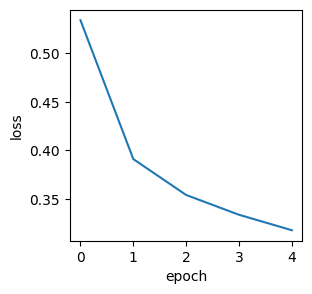

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.plot(history.history['loss'])  # 딕셔너리에는 에포크 순서대로 vlaue가 들어있는 리스트가 존재한다
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

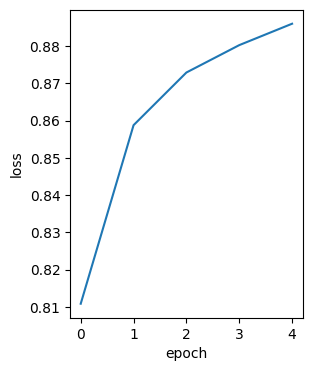

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,4))
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
# epoch수가 늘어날수록 손실이 감소하고 정확도가 향상됨

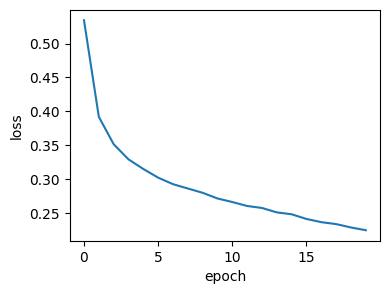

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.figure(figsize=(4,3))
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
# 검증세트에 대한 손실값도 확인해보기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
# 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit()메서드에 검증데이터를 전달 할 수 있다

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


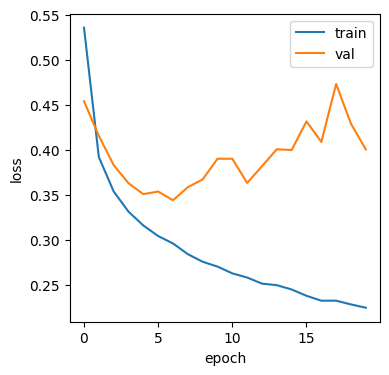

In [12]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 과대적합

In [13]:
# 적응적 학습률을 사용하는 Adam으로 옵티마이저를 변경하여 과대적합을 완화시켜보기
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_adam = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [14]:
# Adam optimizer를 사용하면서 학습률도 바꿔 과대적합을 완화시켜보기(default학습률=0.001)
adam = keras.optimizers.Adam(learning_rate=0.1)
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_uprate = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [15]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_downrate = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [18]:
adam = keras.optimizers.Adam(learning_rate=0.9)
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_extremeup = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [19]:
adam = keras.optimizers.Adam(learning_rate=0.000001)
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history_extremedown = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

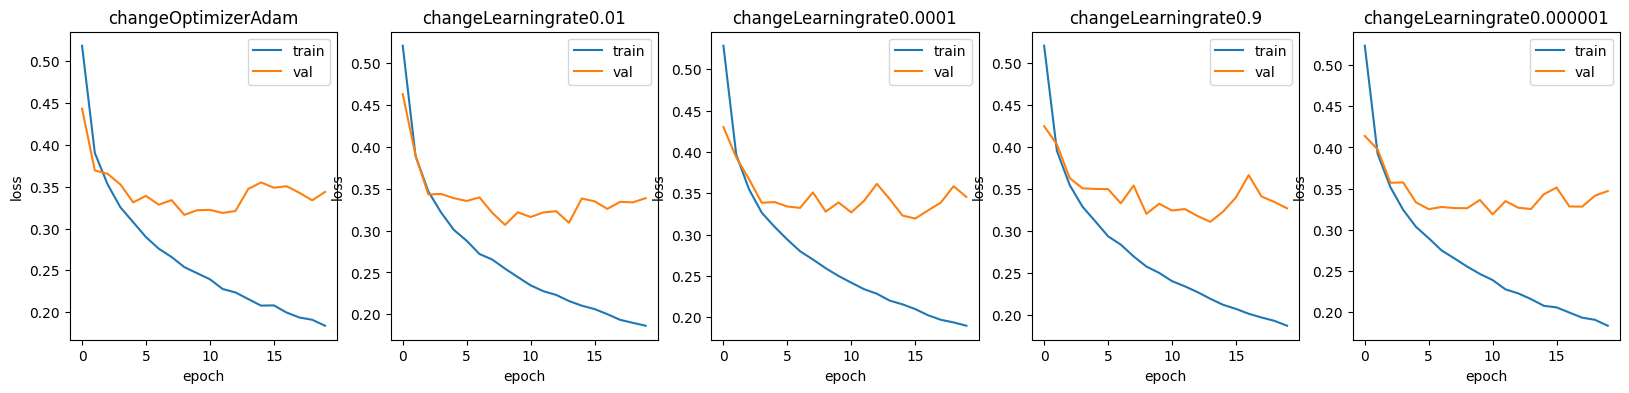

In [22]:
fig, axs = plt.subplots(1,5,figsize=(20,4))

plt.subplot(1,5,1)
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('changeOptimizerAdam')
plt.legend(['train', 'val'])

plt.subplot(1,5,2)
plt.plot(history_uprate.history['loss'])
plt.plot(history_uprate.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('changeLearningrate0.01')
plt.legend(['train', 'val'])

plt.subplot(1,5,3)
plt.plot(history_downrate.history['loss'])
plt.plot(history_downrate.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('changeLearningrate0.0001')
plt.legend(['train', 'val'])

plt.subplot(1,5,4)
plt.plot(history_extremeup.history['loss'])
plt.plot(history_extremeup.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('changeLearningrate0.9')
plt.legend(['train', 'val'])

plt.subplot(1,5,5)
plt.plot(history_extremedown.history['loss'])
plt.plot(history_extremedown.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('changeLearningrate0.000001')
plt.legend(['train', 'val'])

plt.show()
# 0.01과 00001은 비슷해보임 -> 더 극단적 값으로 학습해보자
# 다 비슷해 보이는데..

In [24]:
# 드롭아웃 : 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막는다 (얼마나 드롭할지는 하이퍼파라미터)
# 특정 뉴런에 과도하게 의존하는 것을 막음
# keras에서는 keras.layers패키지 아래 Dropout클래스로 제공함
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


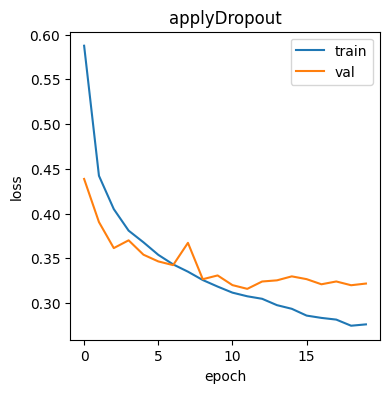

In [25]:
# 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않아야함 -> keras는 모델을 평가, 예측할 때 자동으로 드롭아웃을 적용하지 않음
# dropout layer을 추가한 모델을 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.figure(figsize=(4,4))
plt.title('applyDropout')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 과대적합이 줄었다 10이상부터는 과대적합이 심해지는 결과 -> 에포크줄이기

In [27]:
# 모델 저장하기
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [28]:
# 훈련된 모델의 파라미터를 저장하는 메서드 save_weights()
# 텐서플로의 체크포인트 포맷으로 저장하지만 확장자가 .h5일 경우 HDF5포맷으로 저장함
model.save_weights('model-weights.h5')

In [29]:
# 모델구조와 모델파라미터를 함께 저장하는 메서드 save()
# 텐서플로의 SavedModel포맷으로 저장하지만 확장자가 .f5일 경우 HDF5포맷으로 저장함
model.save('model-whole.h5')

In [30]:
# 파일이 잘 만들어졌는지 확인하기
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jul 26 05:20 model-weights.h5
-rw-r--r-- 1 root root 981176 Jul 26 05:21 model-whole.h5


In [31]:
# model-weights파일과 model-while파일을 비교하기
# model-weights파일을 load_weights()메서드로 가져오기
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
# load_weights메서드를 사용하려면 save_weights로 저장했던 모델과 정확히 같은 구조를 가져야 한다.

In [32]:
# 케라스에서 예측을 수행하는 predict() 메서드는 10개(다중분류)의 클래스에 대한 확률을 반환함
# 샘플의 개수가 12000개 이므로 (12000,10) 크기의 배열을 반환함

# predict결과와 val_target을 비교하여 정확도를 구하기
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# axis=-1 은 배열의 마지막 차원을 따라 최댓값을 고름, 배열이 2차원이므로 인덱스1인 열을 따라 최댓값을 고름
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8820833333333333


In [33]:
# load_model로 model-whole을 읽어와서 정확도 구하기
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)
# load_model()함수는 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate()메소드를 사용할 수 있다.

375/375 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8821


[0.32926511764526367, 0.8820833563804626]

In [34]:
# 둘 다 같은 모델이므로 정확도가 같다

In [35]:
# 콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체 (keras.callbacks라이브버리에 존재)
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
# save_best_only=True : 가장 낮은 검증 점수를 만드는 모델을 저장 해당 파일의 이름은 'best-model.h5'
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# fit()에 callbacks매개변수를 리스트형태로 넣음

In [37]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)
# 가장 낮은 검증 점수의 모델 평가하기

375/375 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8865


[0.3173862397670746, 0.8865000009536743]

In [38]:
# EarlyStopping callback : 검증 점수가 상승하기 시작하면 과대적합이 시작되기 전에 훈련을 미리 중지하는 것
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# patience : 검증 점수가 향상되지 않더라도 참을 에포크 횟수, restore_best_weights=True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=100, verbose=0, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
# checkpoint와 early_stopping콜백을 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증손실이 다시 상승할 때 훈련을 중지할 수 있다.

In [39]:
print(early_stopping_cb.stopped_epoch) # 어디에서 훈련이 멈췄는지 알 수 있다.

6


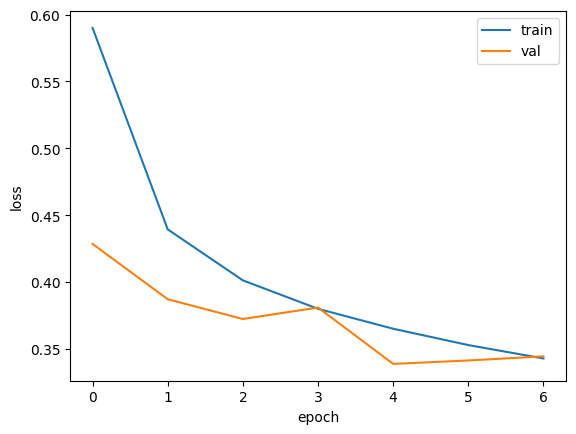

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3387 - accuracy: 0.8764


[0.33871129155158997, 0.8764166831970215]